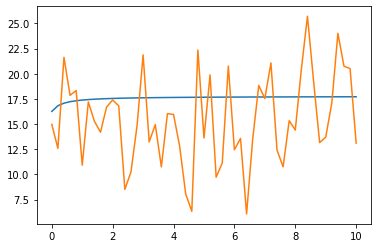

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def GetVolt():
    w = 0 + 4*np.random.randn()
    z = 14.4 + w
    return z
    
def SimpleKalman(z):
    A = np.matrix('[1]')
    H = np.matrix('[1]')  
    Q = np.matrix('[0]')
    R = np.matrix('[4]')
    x = np.matrix('[14]')
    P = np.matrix('[6]')
    while True:
        xp = A*x
        Pp = A*P*A.getT() + Q
        K = Pp*H.getT()*np.matrix.getI(H*Pp*H.getT() + R)
        x = xp + K*(z - H*xp)
        P = Pp - K*H*Pp
        volt = x
        yield volt
        
dt = 0.2
t  = np.arange(0, 10+dt, dt)

Nsamples = len(t)

Xsaved = np.zeros(Nsamples)
Zsaved = np.zeros(Nsamples)
volt = SimpleKalman(GetVolt())

for k in range(Nsamples):
    z = GetVolt()
    Xsaved[k] = next(volt)
    Zsaved[k] = z

fig, ax = plt.subplots()
ax.plot(t, Xsaved)
ax.plot(t, Zsaved) 

In [ ]:
%%writefile 